In [5]:
import polars as pl
import plotnine as p9

In [19]:
BENCHMARK_DATA = pl.read_parquet("benchmark_data.parquet").with_columns(
    pl.col("Time").log1p().alias("Log(Time)")
)

# replace_non_ascii

replace_non_ascii replaces non-ascii characters with a specified value. It contains a fast path when the specified value is the empty string "". In this case, it dispatches to a Rust plugin, remove_non_ascii. This benchmarks the fast path versus the generalized regex and a pure Python version.

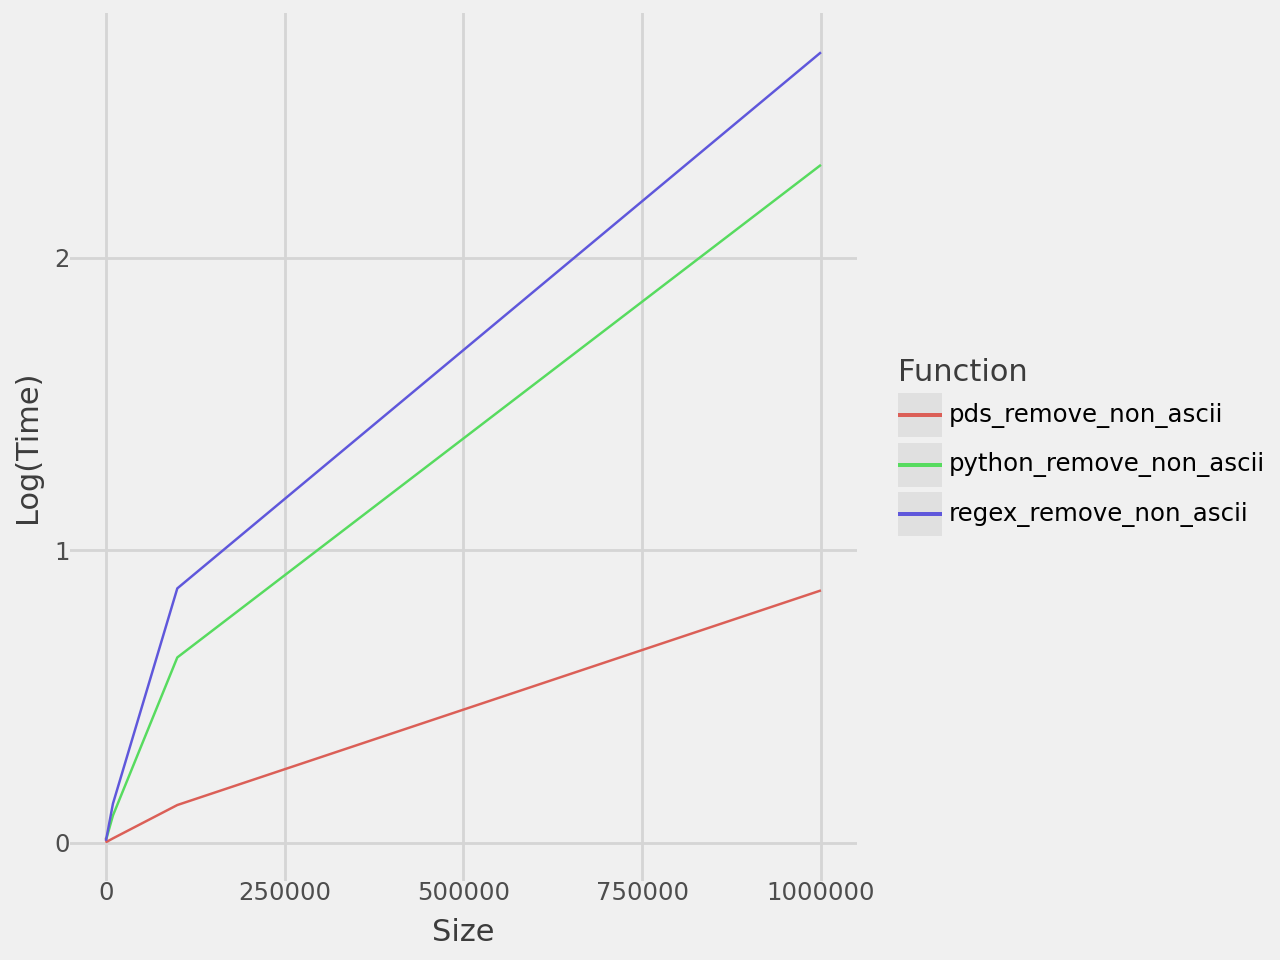

In [20]:
(
    p9.ggplot(BENCHMARK_DATA, p9.aes(x="Size", y="Log(Time)", color="Function"))
    + p9.geom_line()
    + p9.theme_538()
)